
# <span style="font-family: 'Times New Roman';">Convolutional Neural Networks</span>
  <span style="font-family: 'Times New Roman';">are typically implemented with a series of blocks of layers.</span>
  <span style="font-family: 'Times New Roman';">
  Convolutional Layers apply filters to images to find patterns or connections within the image.
  Pooling Layers condense image information without losing much information.
  Batch Normalization Layers adjust data for better future processing.

<span style="font-family: 'Times New Roman';">Contents:</span>
 - <span style="font-family: 'Times New Roman';">Preprocessing</span>
   - <span style="font-family: 'Times New Roman';">Padding</span>
 - <span style="font-family: 'Times New Roman';">Convolution</span>
   - <span style="font-family: 'Times New Roman';">Hyperparameters</span>
   - <span style="font-family: 'Times New Roman';">Filters</span>
 - <span style="font-family: 'Times New Roman';">Post Convolution</span>
   - <span style="font-family: 'Times New Roman';">Pooling</span>
   - <span style="font-family: 'Times New Roman';">Batch Normalization</span>


# <span style="font-family: 'Times New Roman';">Import Dependencies</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from cnn_helper import *


%matplotlib inline

In [14]:
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'torch version: {torch.__version__}')


numpy version: 1.26.0
pandas version: 2.1.1
torch version: 2.1.1


A convolutional layer works by applying a filter to every pixel of an image and taking the result as output.
Here a filter is a matrix of values and applying that filter is to take the sum of the element-wise multiplication of the filter's value and its cooresponding image pixel channel value.

Either we only take values where the filter can fit fully in the image (valid), or we can add pixels around the edge of the input image so that the result is of the same shape as the input (same). 

Often as a convenience it is useful to pad the image before applying filters to keep the shape of the data the same.


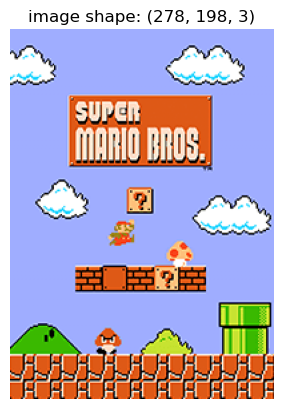

In [3]:
image_rgba = plt.imread('mario198x278.png')

image = image_rgba[:, :, :3]        # take only RGB channels
plt.imshow(image,cmap='hsv');
plt.axis('off');
plt.title(f'image shape: {image.shape}');

## Padding

We intend to apply 2 dimensional filters to images.  This creates two possbilities in implementation.  We can either apply the filter to regions of the image where the filter fits completely, or we can add dummy pixels to the edges of the image so we can apply the filter completely.
The former method results in data of a slightly smaller shape.
The latter method results in data of the same shape as the input.



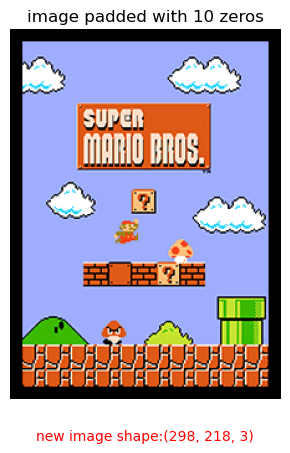

In [13]:
img_padded = padOne(image=image,pad=10)
plt.title('image padded with 10 zeros')
plt.axis('off')
plt.text(0.5, -0.1,f'new image shape:{img_padded.shape}', ha='center', va='center', fontsize=10, color='red', transform=plt.gca().transAxes)
plt.imshow(img_padded);


## Filters

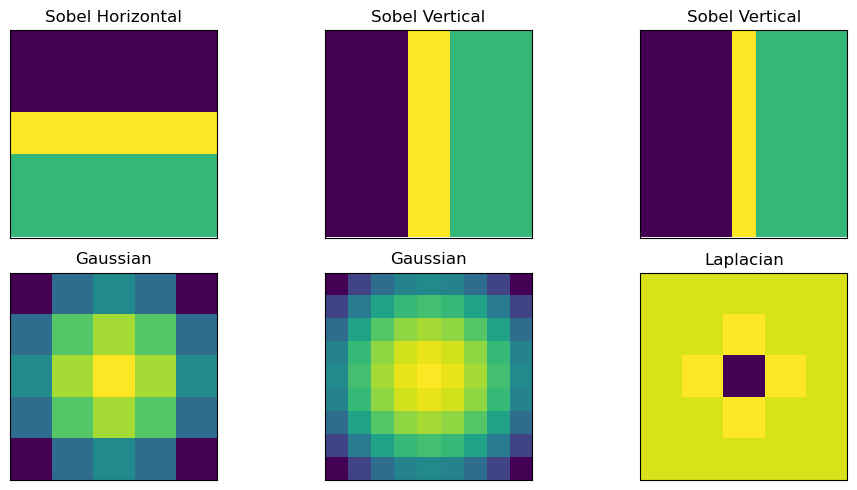

In [3]:

filter_values_list = [sobel_h_filter(5),sobel_v_filter(5),sobel_v_filter(9),
                      gauss_filter(5,5),gauss_filter(9,10),laplacian_filter(5,-16)] 
filter_names_list = ['Sobel Horizontal','Sobel Vertical','Sobel Vertical','Gaussian','Gaussian','Laplacian']

multiple_heatmap_fig = create_multiple_filter_heatmaps(filter_values_list=filter_values_list,filter_names_list=filter_names_list, rows=2, cols=3)
plt.show(multiple_heatmap_fig)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


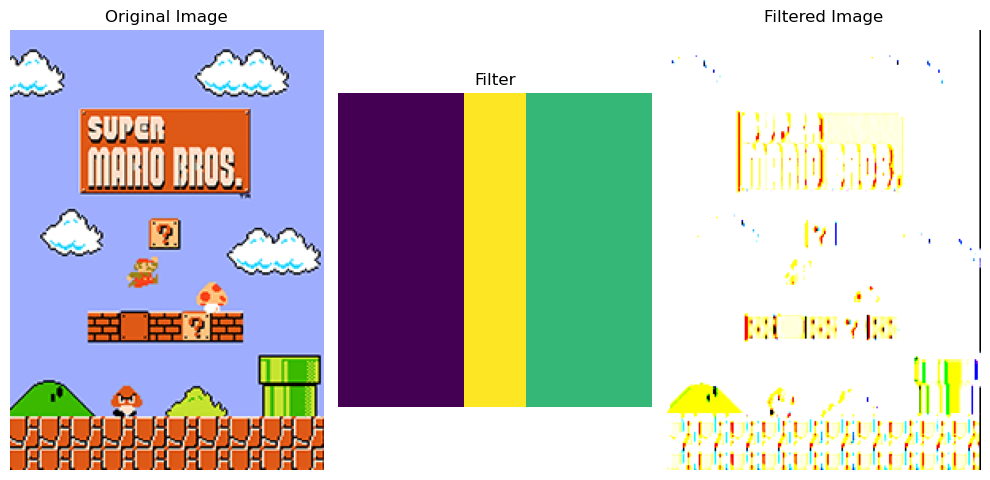

In [4]:
display_image_filter_and_result(image=image,afilter=sobel_v_filter(5),padding='same',stride=1)

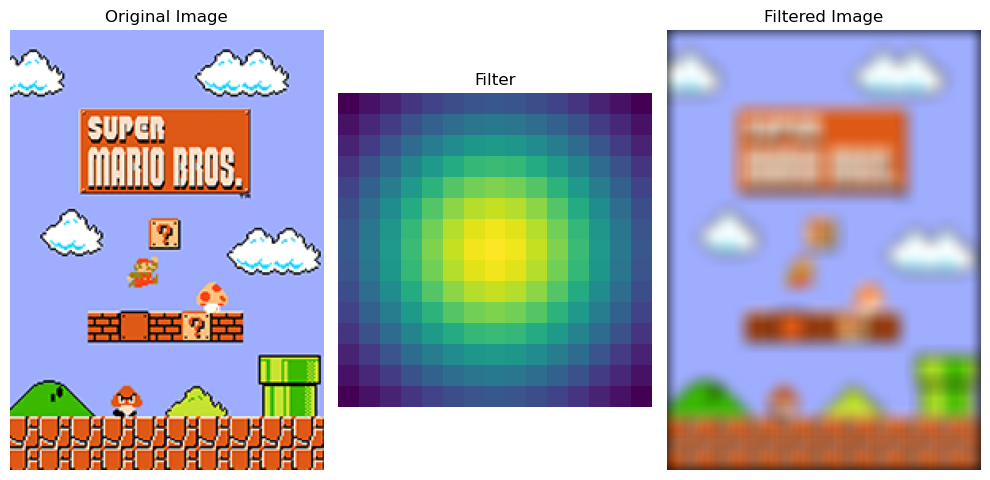

In [6]:
display_image_filter_and_result(image=image,
                                afilter=gauss_filter(15,5),
                                padding='same',
                                stride=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


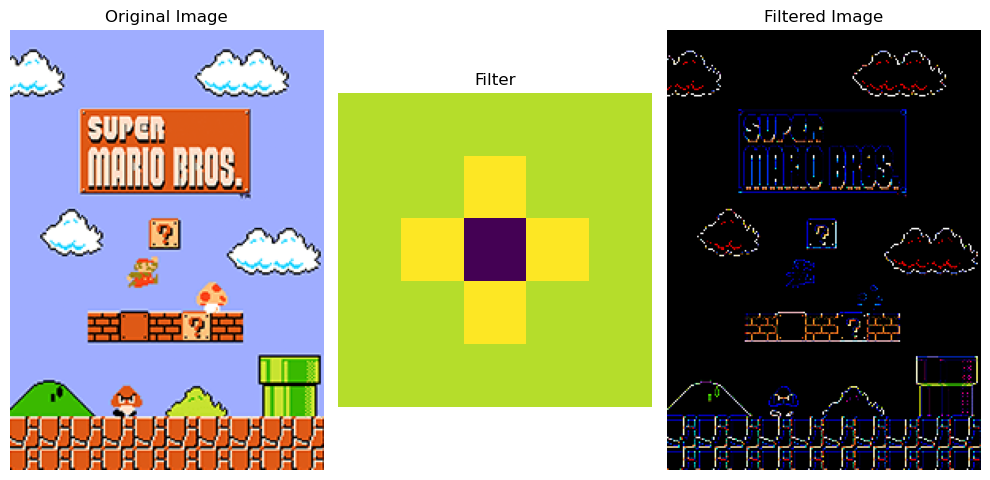

In [7]:
display_image_filter_and_result(image=image,
                                afilter=laplacian_filter(5,-8),
                                padding='same',
                                stride=1)

## Pooling

An interesting feature of images is that when the resolution of an image is reduced less information is lost than expected.  Pooling reduces the size of the data and reduces the future complexity of the model.  
Pooling takes a summary of a region and passes it as the truth.  As such small variations or translations in the input will not greatly impact the result.
Summarizing a region of an image serves to accentuate dominant features of the image. 

 - Max Pooling passes on the maximum value for the region
 - Average Pooling passes on the average value for the region

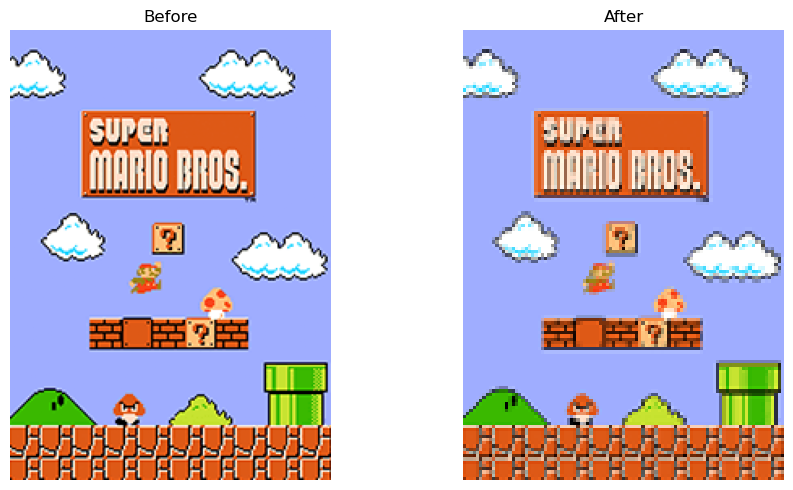

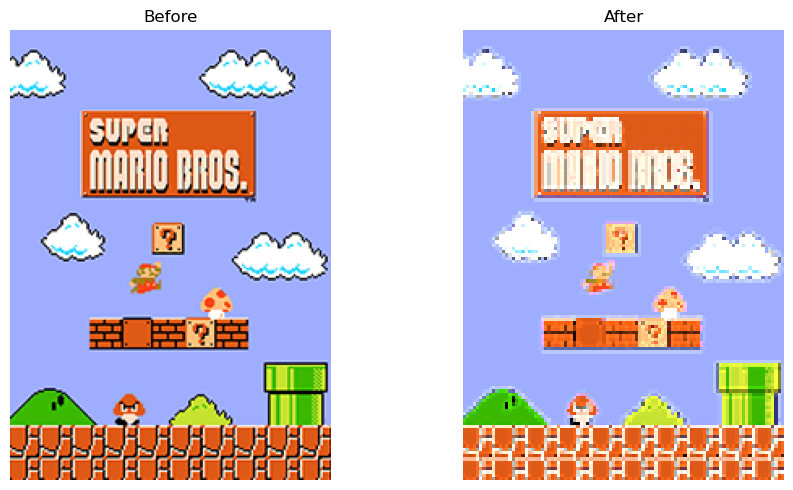

In [8]:
show_avgpool(image)
show_maxpool(image)

## Batch Normalization

Used to bring weights back into some standardized range.
Regularization (overfitting reduction) method used to allow better generalization in the model.  
Commonly applied after convolution but before activation.

The computation of the Batch Norm invokes the mean and variance of the batch.  The Batch Norm is a vector function, as such takes in account all values in the vector in account when producing output.
Additionally, the divergence from the ground truth calculated per sample is dependent on the other data in the batch.  This serves to improve generality and reduce overfitting.

As a side effect, if all the samples in a batch are identical or very similar this layer will prevent gradient calculation and essentially block back propogation.

Below we see the Resnet architecture with Batch Norm layers after many convolutional layers.


![Alttext](resnetblocks.png "Optional title")


The architecture of ResNet-50-vd. (a) Stem block; (b) Stage1-Block1; (c) Stage1-Block2; (d) FC-Block.